# **Data Science Machine Learning Project 2**

For this Project I was tasked to find my own dataset that not only fit certain criteria, but also something that interests me or my future endeavors.

I chose a dataset that pertains to the healthcare industry. As I come from a pharmacy background, and would like to work in data science in the healthcare industry this dataset uncompases both these goals.

**Context**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Part 1 Choosing a Dataset

**Project 2 - Part 1** 

For this task:

Create a Colab notebook where you have uploaded and shown the .head() of each of your data sets.  For each of the proposed datasets, answer the following questions:

1) Source of data

Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

2) Brief description of data

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, and smoking status. Each row in the data provides relavant information about the patient.

3) What is the target?

If a patient will have a stroke or not

4) Is this a classification or regression problem?

Classification

5) How many features?

12

6) How many rows of data.

583

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

Being able to tune the data to be accurate and precicise enough to be able to evaluate if a patient will have a stroke. Being able to explore and explain the data in a way that makes sense and leads to logical conclusions.

# Mount Drive / Import Libraries / Load Dataset / Check Info

## Mount Drive


In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(display='diagram')

## Load Dataset

In [3]:
# Load dataset 
df= '/content/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(df, index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Check Info

In [4]:
# Get a quick overview of the data within the columns and what data type the column provides
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


# Part 2 Clean the Data

**Project 2 - Part 2** 

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.  

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-identified outliers

-clearly commented all of your cleaning steps and described any decisions you made  


# Data Cleaning

## Rename Columns

In [5]:
# Rename Columns to Clean Things Up
df.rename(columns = {'gender':'Gender', 'age':'Age', 'hypertension':'Hypertension', 'heart_disease':'Heart_Disease', 'ever_married':'Ever_Married', 'work_type':'Work_Type', 'Residence_type':'Residence_Type', 'avg_glucose_level':'Avg_Glucose_Level', 'bmi':'BMI', 'smoking_status':'Smoking_Status', 'stroke':'Stroke'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5110 non-null   object 
 1   Age                5110 non-null   float64
 2   Hypertension       5110 non-null   int64  
 3   Heart_Disease      5110 non-null   int64  
 4   Ever_Married       5110 non-null   object 
 5   Work_Type          5110 non-null   object 
 6   Residence_Type     5110 non-null   object 
 7   Avg_Glucose_Level  5110 non-null   float64
 8   BMI                4909 non-null   float64
 9   Smoking_Status     5110 non-null   object 
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


## Check For Duplicates

In [6]:
# Check for Duplicates
df.duplicated().sum()

0

## Identify and Address any Missing Values

In [7]:
# Identify and address any missing values in this dataset. 
df.isna().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
dtype: int64

40% of the data for the BMI column is missing I will choose to drop this column since this is a significant amount of missing data.

In [8]:
# Drop BMI column
df = df.drop(columns=['BMI'])
df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


## Clean up Numerical Columns

In [9]:
# Check Data types
data_types = df.dtypes
numerical_data_types = data_types[(data_types == "float64") | (data_types == "int64")]
numerical_data_types

Age                  float64
Hypertension           int64
Heart_Disease          int64
Avg_Glucose_Level    float64
Stroke                 int64
dtype: object

In [10]:
# Check for Outliers
df.describe()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,0.048728
std,22.612647,0.296607,0.226063,45.283560,0.215320
min,0.080000,0.000000,0.000000,55.120000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,0.000000
max,82.000000,1.000000,1.000000,271.740000,1.000000


In [11]:
# Check unique values in dataset
df.apply(lambda x: len(x.unique()))

Gender                  3
Age                   104
Hypertension            2
Heart_Disease           2
Ever_Married            2
Work_Type               5
Residence_Type          2
Avg_Glucose_Level    3979
Smoking_Status          4
Stroke                  2
dtype: int64

I will check the Age and Avg_Glucose_Level columns to see why there is so many unique values. 

The Age column is figured out to the exact amount of days the person was alive on the day of the testing. This is unnecessary, and does not provide any extra value to the information this way. By Rounding the numbers to the closest interger we will decrease the amount of unique values, which will help in future processing and visualization. I will also convert the column to an int since I am rounding the column. This decreases the amount of unique values from 104 to 82.

In [12]:
# Check values for the Age column
df['Age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [13]:
# Round the Age column
df['Age'] = df['Age'].apply(np.ceil)
df['Age'] = df['Age'].apply(np.int64) 
df['Age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  2, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        1, 41,  5, 26, 31,  7, 12, 62,  9, 15, 28, 10, 19,  6])

The Avg_Glucose_Level column was filled with the exact level. This is giving us 3,979 unique values. As there is no significant difference between it being an interger or a decimal I will choose to round this column. By Rounding the numbers to the closest interger we will decrease the amount of unique values, which will help in future processing and visualization. I will also convert the column to an int since I am rounding the column. This decreases the amount of unique values from 3,979 to 207

In [14]:
# Check values for the Avg_Glucose_Level column
df['Avg_Glucose_Level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [15]:
# Round the Avg_Glucose_Level
df['Avg_Glucose_Level'] = df['Avg_Glucose_Level'].apply(np.ceil) 
df['Avg_Glucose_Level'] = df['Avg_Glucose_Level'].apply(np.int64) 
df['Avg_Glucose_Level'].unique()

array([229, 203, 106, 172, 175, 187,  71,  95,  77,  59,  81, 121, 105,
       220, 215, 168, 192, 222,  90, 218, 194, 234, 209, 103, 101, 190,
       196, 212, 213,  84, 197, 253,  85,  75,  93,  61,  79,  72, 145,
        91, 214, 244, 110, 108, 100,  76, 128, 125, 198,  60, 238, 195,
       181, 186,  62,  94, 114,  87,  73,  63, 180, 117,  97,  67, 241,
       111, 166, 144, 102,  89,  80, 112,  99, 227,  69,  65, 236,  83,
       191, 232,  74, 130, 107, 225, 217, 260, 250, 132, 201, 131, 183,
       207, 264, 141, 208, 200, 104, 152,  68, 240, 170, 224,  78,  58,
        82, 204, 134, 163,  92,  98,  57, 113, 138, 216, 210, 206, 119,
       272, 243, 115, 176,  88, 135,  96, 211, 251, 185, 219, 248,  70,
       162,  86, 199,  56, 150, 118, 142, 147, 221, 116, 235, 230, 139,
       137, 127,  64, 252, 124, 123, 179, 148, 140, 226, 228, 146, 202,
       171, 133,  66, 184, 109, 156, 164, 189, 205, 126, 159, 149, 157,
       122, 120, 223, 129, 174, 153, 255, 161, 136, 160, 237, 14

## Clean up Categorical Columns

In [16]:
# Identify and address any inconsistencies in categorical values
# Double check for anymore random values, mispellings or duplicates
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Gender', 'Ever_Married', 'Work_Type', 'Residence_Type',
       'Smoking_Status'],
      dtype='object')

In [17]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Gender
Female    2994
Male      2115
Other        1
Name: Gender, dtype: int64



- Column= Ever_Married
Yes    3353
No     1757
Name: Ever_Married, dtype: int64



- Column= Work_Type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: Work_Type, dtype: int64



- Column= Residence_Type
Urban    2596
Rural    2514
Name: Residence_Type, dtype: int64



- Column= Smoking_Status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking_Status, dtype: int64





In [18]:
# Address the Work_Type column values
df['Work_Type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [19]:
# Replace with correct values
df['Work_Type']= df['Work_Type'].replace('Self-employed', 'Self_Employed')
df['Work_Type']= df['Work_Type'].replace('children', 'Children')
df['Work_Type']= df['Work_Type'].replace('Govt_job', 'Govt_Job')
df['Work_Type']= df['Work_Type'].replace('Never_worked ', 'Never_Worked')
df['Work_Type'].value_counts()

Private          2925
Self_Employed     819
Children          687
Govt_Job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [20]:
# Address the Smoking_Status column values
df['Smoking_Status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking_Status, dtype: int64

In [21]:
# Replace with correct values
df['Smoking_Status']= df['Smoking_Status'].replace('never smoked', 'Never_Smoked')
df['Smoking_Status']= df['Smoking_Status'].replace('formerly smoked', 'Former_Smoker')
df['Smoking_Status']= df['Smoking_Status'].replace('smokes', 'Active_Smoker')
df['Smoking_Status'].value_counts()

Never_Smoked     1892
Unknown          1544
Former_Smoker     885
Active_Smoker     789
Name: Smoking_Status, dtype: int64

In [22]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,229,Former_Smoker,1
51676,Female,61,0,0,Yes,Self_Employed,Rural,203,Never_Smoked,1
31112,Male,80,0,1,Yes,Private,Rural,106,Never_Smoked,1
60182,Female,49,0,0,Yes,Private,Urban,172,Active_Smoker,1
1665,Female,79,1,0,Yes,Self_Employed,Rural,175,Never_Smoked,1


# Part 3 Visualizing the Data


**Project 2 - Part 3**

For this part of the project, you will continue your EDA by 

-produced univariate visuals for the target and all features

-Identifying any moderate or strong correlations between your target and your features and/or between one feature and another

-Creating multivariate exploratory visuals to further understand your data

From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. These visuals should be reporting quality.  Be sure to explain the finding associated with each visual.  (NO histograms, boxplots, or correlation plots)

# Exploratory Data Analysis

## Prep for Visualization


In [23]:
# Make a Dataframe for Visualization Purposes
vis_df= df.copy()

In [24]:
# Hypertension: 0 if the patient doesn't have Hypertension, 1 if the patient has Hypertension
vis_df["Hypertension"] = df["Hypertension"].map({1: "Yes", 0: "No"})
#1 if the patient had a stroke or 0 if not
vis_df["Stroke"] = df["Stroke"].map({1: "Yes", 0: "No"})
#0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
vis_df["Heart_Disease"] = df["Heart_Disease"].map({1: "Yes", 0: "No"})

In [25]:
def pie_graph(df,title,values):   
    labels = vis_df[values].value_counts().index
    values = vis_df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()

In [26]:
# cohort analysis of age with output
def age_cohort(age):
    if   age >= 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60:
        return "60+"
    
vis_df['age group'] = vis_df['Age'].apply(age_cohort)
vis_df.sort_values('age group', inplace = True)

In [36]:
def count_bar_plot(df,x,hue,title):
    fig = sns.countplot(x=x, hue=hue, data=df)
    fig.set_title(title)

In [44]:
def horizontal_bar_chart(df,x,y,color,title):    
    fig = px.bar(df, x=x, y=y, color=color,                  
                 height=600,
                 title=title)
    fig.show()

## Univariate Visualizations

The Following Graphs are univariate visualizations of the target and the features for the dataset. Doing this kind of visualization allows myself and the reader the ability to get a good understanding of the distribution of data in a very quick amount of time. 

In [27]:
pie_graph(vis_df,"Age Group Distribution",'age group')

In [28]:
pie_graph(vis_df, 'Gender Distribution','Gender')

In [29]:
pie_graph(vis_df, 'Hypertension Distribution','Hypertension')

In [30]:
pie_graph(vis_df, ' Heart disease Distribution','Heart_Disease')

In [31]:
pie_graph(vis_df, 'Ever married  Distribution','Ever_Married')

In [32]:
pie_graph(vis_df, 'Work type Distribution','Work_Type')

In [33]:
pie_graph(vis_df, 'Residence type Distribution','Residence_Type')

In [34]:
pie_graph(vis_df,'Smoking Status Distribution','Smoking_Status')

In [35]:
pie_graph(vis_df, 'Stroke Distribution', 'Stroke')

## Multivariate Visualization and Correlations

The Following Graphs are Multivariate visualizations of the target vs some of its features. Doing this kind of visualization allows myself and the reader the ability to get a good understanding of the correlation between the target and its features, and whether or not this correlation relates to any relevant information.

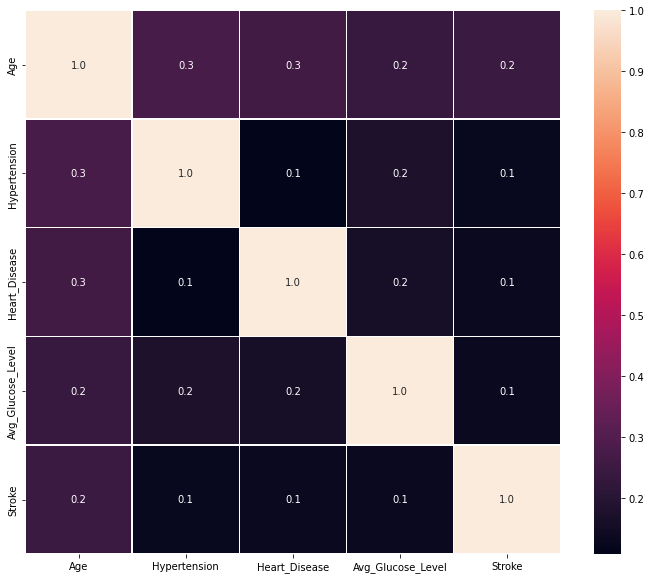

In [47]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax)

The heatmap is for a more technical audience, but it is important to note that according to the data no individual feature has an overly strong correlation to the target. The features that have the strongest correlations is individuals have a higher chance for Hypertension and Heart Disease the older they get.

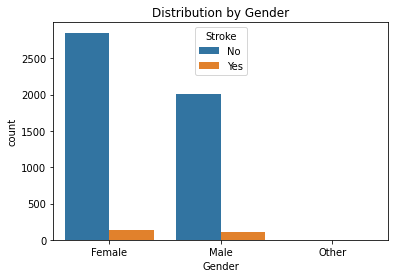

In [39]:
count_bar_plot(vis_df,'Gender','Stroke','Distribution by Gender')

Men have a slightly higher chance for stroke. 

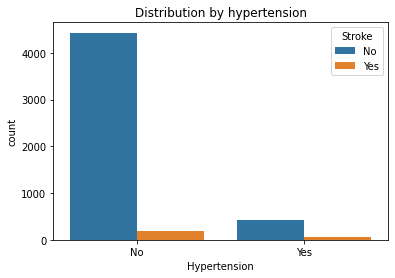

In [40]:
count_bar_plot(vis_df,'Hypertension','Stroke','Distribution by hypertension')

Individuals that have Hypertension are at an increased chance to have a stroke compared to individuals that do not have Hypertension.

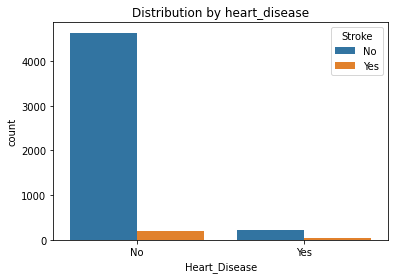

In [42]:
count_bar_plot(vis_df,'Heart_Disease','Stroke','Distribution by heart_disease')

Individuals that have Heart Disease are at an increased chance to have a stroke compared to individuals that do not have Heart Disease.

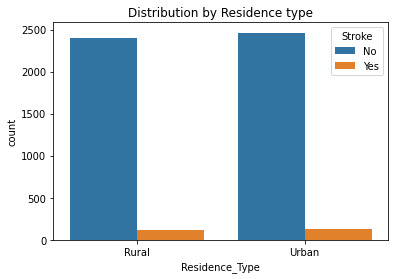

In [43]:
count_bar_plot(vis_df,'Residence_Type','Stroke','Distribution by Residence type')

It is intersting to note that Residence Type does not appear to any correlation to whether or not an individual has a stroke. 

In [45]:
group = vis_df.groupby(['Stroke','Work_Type'],as_index = False).size().sort_values(by='size')
horizontal_bar_chart(df = group,x = 'Stroke',y = 'size',color = 'Work_Type',title = 'Distribution of stroke by work type')

According to the graph individuals that are Self Employed have the strongest correlation to whether or not an individual will have a stroke.

In [46]:
group = vis_df.groupby(['Stroke','Smoking_Status'],as_index = False).size().sort_values(by='size')
horizontal_bar_chart(df = group,x = 'Stroke',y = 'size',color = 'Smoking_Status',title = 'Distribution of stroke by smoking status')

According to the graph individuals that are or were Smokers have the strongest correlation to whether or not an individual will have a stroke.